<a href="https://colab.research.google.com/github/frances-son/data-analysis/blob/main/Data_Driven_Report_chp3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 306 페이지
### 대량의 텍스트 데이터를 이해하다 : 토픽 모델링
* 사례 : 전 직원 대상 설문조사의 서술형 응답 분석하기
* 요약
 * 토픽 모델링 - 다양한 텍스트 속에서 주요 주제를 찾기
  * 기계가 토픽을 분류해주지만, 토픽의 주제는 사람이 결정해야 한다.
  * 기계가 토픽을 분류해주지만, 토픽을 몇 개로 나눌지도 사람이 결정해야 한다.
 * 정형 데이터 분석과 달리, 비정형 데이터인 텍스트를 활용해 비지도학습으로 데이터 분류
* 주의
 * 토픽 모델링은 종속 변수가 정의되지 않는 '비지도학습' 방식이므로, 기계가 토픽을 분류하지만 분석가의 해석 능력으로 각 토픽이 어떤 내용인지 판단해야함. 또한 토픽을 몇 개로 분류할 것인지도 분석자의 재량으로 결정해야 함. 여기서는 LDA 토픽 모델링 방식을 소개함. -> LDA 토픽 모델링 시각화 파일(https://zrr.kr/Sd2u) 추천 -> 책과 해당 링크의 결과가 다름
* 예시에서 사용할 데이터 : 문재인 대통령의 연설문
* 순서 : 데이터 불러오기 > 텍스트 읽기 > 텍스트 데이터 정제 > 최적 토피 개수 선정 > LDA 모델 실행 > 시각화

In [2]:
!git clone https://github.com/sangsucki/DataDrivenReport.git
!pip install fitz
!pip install PyMuPDF

fatal: destination path 'DataDrivenReport' already exists and is not an empty directory.


In [3]:
import fitz
doc = fitz.open("/content/DataDrivenReport/문재인 대통령 연설문 선집.pdf")

In [4]:
# 전체 페이지 수 알기
page = doc.page_count
print(page)

62


** 각 페이지의 텍스트 읽기
* texts 라는 공백의 리스트 만들기
* for 문을 사용하여 PDF 문서의 각 페이지를 반복. load_page() 메서드는 PDF 문서의 현재 페이지를 메모리에 로드하는 데 사용됨. 페이지 번호 i는 로드할 페이지를 지정하기 위해 load_page()에 인수로 전달된다.
* get_text("text") 메서드가 로드된 페이지 개체에서 호출되어 페이지에서 텍스트를 추출한다.
* append 함수를 활용해 각 페이지에 추출된 텍스트들이 for문을 통해 texts 리스트 변수에 추가된다.
* for문 실행이 완료되면 texts 리스트 변수에는 PDF 문서의 각 페이지에 있는 모든 텍스트가 포함된다.

In [5]:
texts = []
for i in range(page):
  load = doc.load_page(i)
  pagetext = load.get_text("text")
  texts.append(pagetext)

In [6]:
texts

['걸어온 길 \n나아갈 길\n걸어온 길 나아갈 길\n문재인 대통령 연설문 선집 \n',
 '걸어온 길 \n나아갈 길\n문재인 대통령 연설문 선집 \n',
 '2019년은  \n3.1독립운동과 대한민국 임시정부 수립  \n100년이 되는 해입니다.\n한 해 동안 우리는 지난 100년을 돌아보고  \n새로운 100년을 함께 준비했습니다. \n우리는 반드시 ‘함께 잘사는 나라’.  \n‘평화와 번영의 한반도’에 도달해야 합니다.\n문재인 대통령은 그동안 많은 연설을 통해  \n국민들의 열망과 희망을 이야기했고,\n국민들이 주신 지혜를 담아  \n새로운 100년을 구상하며 함께 나눴습니다.\n  \n우리는 주요 연설을 선별하여  \n역사적인 100주년의 기록으로 남기고자 합니다.\n새로운 100년을 알리는 귀중한 사료로,  \n때로는 이정표로 사용되길 바랍니다.\n',
 '걸어온 길 나아갈 길 \n1. 신년기자회견 2019.01.10. \n2. 백범기념관 국무회의 2019.02.26.\n함께 잘 사는 새로운 대한민국 \n1. 포용국가 사회정책 대국민보고 2019.02.19. \n2. 3.1절 기념사 2019.03.01.\n3. 제14회 국무회의 2019.04.09.\n평화와 번영, 남북이 함께 마주할 미래 \n1. 오슬로 연설 2019.06.12.\n2. 광복절 경축사 2019.08.15.\n3. 제74차 UN총회 기조연설 2019.09.24.\n004\n024\n032\n042\n060\n068\n084\n104\n목차 \n국민이 \n지킨 역사\n국민이 \n이끌 나라\n',
 '|  005\n004\n신년기자회견 2019.01.10.\n걸어온 길 나아갈 길 \n대한민국 새로운 100년, \n함께 잘 사는 나라\n혁신적 포용국가, 함께 잘 사는 경제, \n한반도 항구적 평화\n키워드\n01\n',
 '006 |  007\n걸어온 길 나아갈 길 100년 문재인 대통령 연설문 선집 \n걸어온 길 나아갈 길 – 신년기자회견\n지난 한 해, 국민들의 힘으로 많은 변화를 이

In [7]:
import pandas as pd
df = pd.DataFrame(texts)

In [8]:
# 데이터 정제를 위해 KoNLPy 설치
!pip install konlpy
from konlpy.tag import Kkma
kkma=Kkma()
print(kkma.nouns(texts[5]))

['006', '007', '길', '100', '100년', '년', '문', '문재인', '재인', '대통령', '연설문', '선집', '신년', '신년기자회견', '기자', '회견', '해', '국민', '힘', '변화', '새해', '여러분', '감사', '번', '인사', '우리', '사상', '최초', '수출', '6', '6천억', '천', '억', '불', '달성', '국민소득', '소득', '3', '3만불', '만', '시대', '세계', '6위', '위', '수출국', '일곱', '번째', '경제', '경제강국', '강국', '클럽', '가입', '경제성', '경제성장률', '장률', '경제발전', '발전', '국가', '중', '수준', '유지', '식민지', '전쟁', '가난', '독재', '극복', '존경', '작년', '이맘때', '진', '진천', '천', '선수촌', '평', '동계', '동계올림픽', '올림픽', '성공', '기원', '개막식', '터', '폐막', '폐막식', '식', '정부', '가슴', '강원', '강원도', '도', '추위', '덕분', '전세계', '남', '북', '평화', '평화올림픽', '수', '있었', '겨울', '저', '맛', '병충해', '보리', '보리농사', '농사', '풍년', '인류학자', '빙하기', '인간성', '온기', '서로', '2019', '연설', '2019.01', '10']


In [9]:
# 문장 안에 있는 특수문자 혹은 기타 인식이 불가능한 문자들을 삭제하는 작업을 하기 위해 re라는 패키지 설치. regular expression

import re
dataset = []
for i in range(len(texts)) :
 dataset.append(kkma.nouns(re.sub('^가-힣a-zA-z0-9', '', texts[i])))
print(dataset)

[['길', '문', '문재인', '재인', '대통령', '연설문', '선집'], ['길', '문', '문재인', '재인', '대통령', '연설문', '선집'], ['2019', '2019년', '년', '3.1', '3.1독립운동', '독립운동', '대한', '대한민국', '민국', '임시', '임시정부', '정부', '수립', '100', '100년', '해', '동안', '우리', '준비', '나라', '평화', '번영', '한반도', '도달', '문재', '대통령', '그동안', '연설', '국민', '열망', '희망', '이야기', '주신', '지혜', '구상', '주요', '선별', '역사적', '100주년', '주년', '기록', '사료', '이정표', '사용'], ['길', '1', '신년', '신년기자회견', '기자', '회견', '2019.01', '10', '2', '백범', '백범기념관', '기념관', '국무', '국무회의', '회의', '2019.02', '26', '새', '대한', '대한민국', '민국', '포용', '포용국가', '국가', '사회', '사회정책', '정책', '대국민', '대국민보고', '보고', '19', '3.1', '3.1절', '절', '기념사', '2019.03', '01', '3', '저', '14', '14회', '회', '2019.04', '09', '평화', '번영', '남북', '미래', '오슬로', '연설', '2019.06', '12', '광복절', '경축', '경축사', '사', '2019.08', '15', '74', '74차', '차', '총회', '기조', '기조연설', '2019.09', '24', '004', '024', '032', '042', '060', '068', '084', '104', '목', '목차', '차', '국민', '역사', '나라'], ['005', '004', '신년', '신년기자회견', '기자', '회견', '2019.01', '10', '길', '대한', '

* 토픽 모델링을 할 때는 불필요한 단어들과 단어 길이를 정리해야함. 정해진 방식이 있는 것은 아님. '문재인', '대통령', '여러분'과 같은 단어들이 빈번하게 나올 수 밖에 없음. '그','저','너' 등 제외
* stopwords 라는 변수에 리스트 형식으로 제거할 해당 명사 직접 작성. 한 번에 모두 작성하기 힘드므로 전체 코드를 실행하면서 불필요한 단어들이 등장할 경우 다시 리스트에 수동으로 추가하는 것 추천.

* 토큰화 및 데이터 정체가 끝나면 단어 사전 구축. BoW(Bag of Words) 방식 사용. 각 단어를 등장한 순서대로 번호를 붙임. 다음 문장에 이전에 등장한 단어가 나오면 이전에 부여했던 번호를 그대로 부여함.

In [10]:
stopwords = ['재인', '선집', '대통령', '연설문', '문재인', '여러분', '모두', '연설', '우리', '100년', '100', '기조연설', '대한민국', '대한', '민국', '기념사', '모두발언', '청와대', '신년기자회견']
data2 = [[word for word in sublist if len(word) > 1 and word not in stopwords] for sublist in dataset]

In [11]:
# !pip install gensim
from gensim import corpora, models
import gensim
dictionary2 = corpora.Dictionary(data2)
corpus2 = [dictionary2.doc2bow(text) for text in data2]
print(corpus2)
# (0,1)의 의미 : 0번째 단어가 1번 나왔다.


[[], [], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(3, 1), (6, 1), (9, 1), (14, 1), (31, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(9, 1), (31, 1), (32, 1), (34, 1), (35, 1), (43, 1), (50, 1), (65, 1), (69, 1), (81, 1), (86, 1), (87, 1), (88, 1), (90, 1), (91, 1), (92, 1), (

** 최적 토픽 개수 선정
* 토픽 모델링은 비지도학습 방식으로, 담당자가 별도로 지정하지 않아도 주어진 자료만으로 컴퓨터가 자동으로 그룹을 분류한다. 토픽 개수 선정은 사람이 개입.
matplotlib.pyplot과 CoherenceModel 라이브러리 사용
* 토픽 모델링에서 최적의 토픽 개수를 찾기 위해서는 일관성coherence과 혼란도perplexity를 살펴봐야 함
 * coherence : 특정 토픽에 대한 단어 간의 일관성. 일관성이 높을수록 토픽 분류가 잘 되었다고 볼 수 있음.
* 아래는 LDA 토픽 모델링 사용. 주제와 관련된 각 단어에 확률을 할당하는 확률모델이고 대량의 텍스트 분석시 효과적. 토픽 모델링을 시행할 때 마다 다른 방식으로 적용될 수 있기 때문에 random_num 이라는 변수에 무작위 숫자를 넣고, ldaModel 함수 내 random_state 파라미터에서 random_num 변수를 적용해 똑같은 결과를 재현하도록 통제함.

* LDA 토픽 모델링은 gensim.models.ldamodel.LdaModel(단어 사전에 맞춰 일련번호가 적용된 문서들, 토픽 개수, 단어 사전)이라는 규칙으로 작동. 여기서는 토픽 개수를 2개부터 9개까지(range(2,10)) for 문으로 순서대로 실행시킨 다음 일관성 측정
* 일관성 측정은 먼저 CoherenceModel(LDA 토픽 모델링 실행 후 저장한 변수, 분석 대상, 단어 사전, 해당 토픽 내 일관성 비교할 상위 단어 개수)로 CoherenceModel을 만들고 coherence_moel_lda.get_coherence()로 해당 모델의 일관성 점수를 구한다. 마지막으로 coherence_values2라는 변수 안에 토픽 개수 2개부터 9개까지의 일관성 점수를 리스트 형식으로 넣는다.


In [12]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [16]:
random_num = 2023

coherence_values2 = []

for i in range(2,10) :
 ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics=i, id2word=dictionary2, random_state = random_num)
 coherence_model_lda = CoherenceModel(model=ldamodel, texts = data2, dictionary = dictionary2,topn=5)
 coherence_lda = coherence_model_lda.get_coherence()
 coherence_values2.append(coherence_lda)

In [17]:
coherence_values2

[0.6183928811769197,
 0.6295162078349134,
 0.6298502068882235,
 0.6125340183628396,
 0.6397689356900244,
 0.626596965423463,
 0.6267519917261029,
 0.6086566038593377]

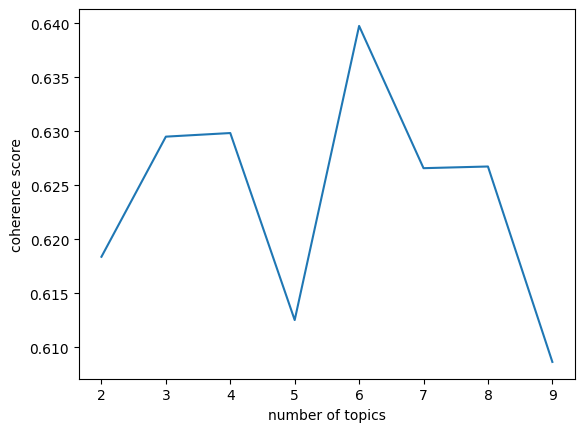

In [18]:
x = range(2,10)
plt.plot(x, coherence_values2)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [19]:
# 일관성 점수는 토픽 개수가 6개일 때 가장 높고, 토픽 개수가 9개일 때 가장 낮음


* 혼란도
 * 혼란도는 낮을수록 좋다. 토픽 모델링은 전체 문서와 각 문장의 단어 빈도를 기준으로 특정 문서 내에서 특정 주제가 나올 확률고 특정 주제 내에서 특정 단어가 나올 확률을 추정하는 확률 모델이다. 확률 모델을 통해 나온 값과 실제 데이터(단어)를 비교했을 때 얼마나 차이가 나는지를 '오차'라고 한다면 오차가 낮을수록 좋은 모델이라고 할 수 있다. 이 오차를 혼란도라고 생각하면 된다.
 * 그렇다고 혼란도의 최저 점수가 나올 때 까지 토픽 개수를 찾는 것은 비추천. 토픽 개수를 100개까지 늘렸을 때 혼란도 점수가 혼란도가 -15로 수렴해감. 토픽을 100개로 구분하면 어떤 내용인지 구별할 수 없음. 혼란도가 낮은 것이 사람의 해석 능력을 높이는 것은 아니다.

In [20]:
perplexity_values2 = []
for i in range(2,10):
  # ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics=i, id2word=dictionary2, random_state= random_num)
  ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics=i, id2word=dictionary2)
  perplexity_values2.append(ldamodel.log_perplexity(corpus2))

In [21]:
print(perplexity_values2)

[-7.972943375027637, -8.17039301296484, -8.373061941974939, -8.577667363447908, -8.823578289905448, -8.991783314505886, -9.075347888463563, -9.292982186963693]


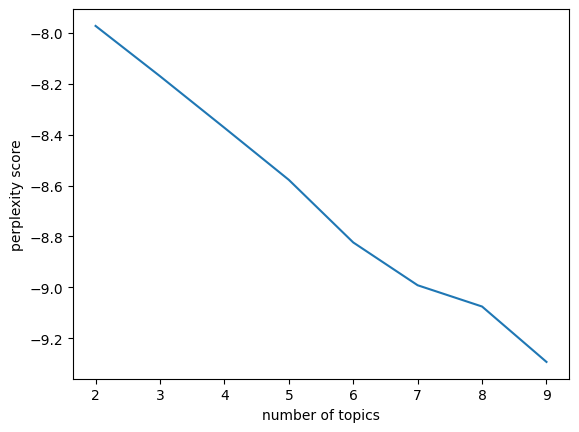

In [22]:
x = range(2,10)
plt.plot(x, perplexity_values2)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

* LDA 토픽 모델링 실행
 * 일관성과 혼란도를 고려했을 때 토픽 최적 개수를 6개 설정한 경우, ldamodel2라는 변수에 토픽 6개에 해당하는 LDA 토픽 모델링을 실행해본다. 여기에 알파값이 있는데 알파값은 0보다 큰 숫자(소수포함)을 입력하면 된다. 알파가 클수록 단어들이 여러 토픽에 균등하게 분배되고, 알파가 작을수록 단어들이 소수의 토픽에 몰린다.

 * 아래 예시에서는 단어들의 토픽 분포를 명확하게 하기 위해 알파값을 0.1로 상대적으로 낮게 준다.

In [23]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=6, alpha=0.1, id2word=dictionary2, random_state=random_num)

In [35]:
pip install pyLDAvis==3.4.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
print(pd.__version__)
print(pyLDAvis.__version__)

1.5.1
3.4.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# !pip install pandas==1.5.1 # pandas 다운그레이드 -> LDA 시각화 위해서. (2.1.1 당시 시각화 호환이 불안정하였음)
# 한 번 실행 후 주석처리 하였음

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(ldamodel2, corpus2, dictionary2)
vis2

# 에러남. 다운그레이드 해도... ipython의 문제인가...?
# stack overflow : This always happens when using multiprocessing in an iPython console in Spyder. A workaround is to run the script from the command line instead.

# 로컬 IDE에서 다시 해봐야할듯...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.